# Quickstart

Let $F(\mathbf{x}) = \mathbf{H} \mathbf{x}$ for some $\mathbf{H} \succ 0$, $g(\mathbf{x}) = \|\mathbf{x}\|_1$, and $\mathcal{S} = \{\mathbf{x} \in \mathbb{R}^n : \mathbf{A} \mathbf{x} \leq \mathbf{b}\}$, for some $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^n$. It is straightforward to verify that $F(\cdot)$ is strongly monotone with $\mu = \lambda_{\min}(\mathbf{H})$ and Lipschitz with $L = \|\mathbf{H}\|_2$. The solution of the VI in can be implemented using ``monviso`` as follows

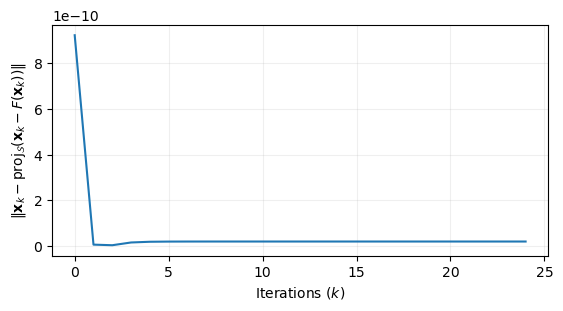

In [4]:
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt

from monviso import VI

np.random.seed(2024)

# Create the problem data
n, m = 30, 40
H = np.random.uniform(2, 10, size=(n, n))
A = np.random.uniform(45, 50, size=(m, n))
b = np.random.uniform(3, 7, size=(m,))

# Make H positive definite
H = H @ H.T

# Lipschitz and strong monotonicity constants
mu = np.linalg.eigvals(H).min()
L = np.linalg.norm(H, 2)

# Define F, g, and S
F = lambda x: H @ x
g = lambda x: cp.norm(x)
S = [lambda x: A @ x <= b]

# Define and solve the VI
vi = VI(n, F, g, S)

x0 = np.random.uniform(4, 5, n)
algorithm_params = {"x": x0, "step_size": 2 * mu / L**2}
sol = vi.solution(
    "pg", algorithm_params, max_iters=25, eval_tol=-np.inf, log_path="logs/quickstart/result.log"
)

# Plot the residual
residual = np.genfromtxt(
    "logs/quickstart/result.log", delimiter=",", skip_header=1, usecols=1
)
fig, ax = plt.subplots(figsize=(6.4, 3))
ax.plot(residual)

ax.grid(True, alpha=0.2)
ax.set_xlabel("Iterations ($k$)")
ax.set_ylabel(
    r"$\|\mathbf{x}_k - \text{proj}_{\mathcal{S}}(\mathbf{x}_k - F(\mathbf{x}_k))\|$"
)
plt.show()